# Импорт

In [24]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [25]:
field_size = 6

In [26]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2

In [27]:
print(feromon_map)

[[0.955825   0.21469323 0.896459   0.88276982 0.35341534 0.61330567]
 [0.21469323 0.94168092 0.436718   0.40555125 0.56410037 0.34839339]
 [0.896459   0.436718   0.09019382 0.86255678 0.19794324 0.91300637]
 [0.88276982 0.40555125 0.86255678 0.24880326 0.48080567 0.68127873]
 [0.35341534 0.56410037 0.19794324 0.48080567 0.72481329 0.68798821]
 [0.61330567 0.34839339 0.91300637 0.68127873 0.68798821 0.61762026]]


In [28]:
print(distance_map)

[[0.2033934  0.26662801 0.36966133 0.58627089 0.82261152 0.47704487]
 [0.26662801 0.11104082 0.92145962 0.6945671  0.46052616 0.72918942]
 [0.36966133 0.92145962 0.4970768  0.70745497 0.4230116  0.55337787]
 [0.58627089 0.6945671  0.70745497 0.7896878  0.36255334 0.10679488]
 [0.82261152 0.46052616 0.4230116  0.36255334 0.08729956 0.65358183]
 [0.47704487 0.72918942 0.55337787 0.10679488 0.65358183 0.21996204]]


In [29]:
def experement(ant: Ant, 
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for i in range(num_of_iteration):
        track = ant.walk(pos=[np.random.randint(0, field_size-1), 
                              np.random.randint(0, field_size-1)], 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map


# Опыт 1

Сравнение результатов при разных гиппер-параметрах у муравья.

In [30]:
ant = Ant(walk_distance=field_size, a=1, b=1)
feromon_map_updater = TrackOfWalk(feromon_volume=field_size*0.9, feromon_erosion_speed=0.9)

In [31]:
feromon_map_result = experement(ant=ant, 
                                feromon_map_updater=feromon_map_updater, 
                                feromon_map=feromon_map, 
                                distance_map=distance_map, 
                                num_of_iteration=40)

In [32]:
print(feromon_map_result)

[[9.96737160e-12 2.23882745e-12 1.17197247e+01 9.20555001e-12
  3.68542576e-12 6.39556979e-12]
 [2.23882745e-12 9.81987672e-12 4.55410833e-12 3.27260799e-01
  5.88245554e-12 3.63305663e-12]
 [9.34830125e-12 4.55410833e-12 9.40543848e-13 1.26795154e+01
  2.06415806e-12 5.17510478e-03]
 [1.04020055e+01 4.22910050e-12 9.31518860e-03 2.59452783e-12
  5.01385593e-12 7.10439493e-12]
 [3.19450912e-03 5.88245554e-12 2.06415806e-12 5.01385593e-12
  7.55837466e-12 1.05319495e-04]
 [6.39556979e-12 3.63305663e-12 5.85108361e-05 7.10439493e-12
  3.83341095e-03 6.44056247e-12]]


In [33]:
print(feromon_map_result > 0.1)

[[False False  True False False False]
 [False False False  True False False]
 [False False False  True False False]
 [ True False False False False False]
 [False False False False False False]
 [False False False False False False]]


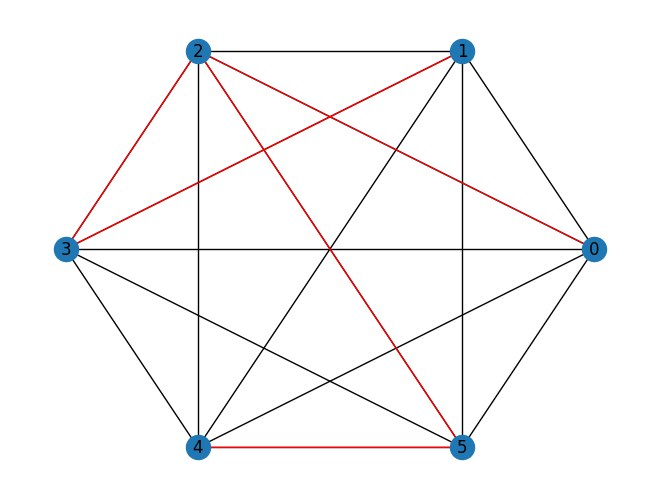

In [35]:
edges = []


for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, field_size))


edges_res = []
for i in range(feromon_map_result.shape[0]):
    for j in range(i, feromon_map_result.shape[0]):
        if i != j and feromon_map_result[i][j] > 1e-10:
            edges_res.append((i, j, field_size))


G = nx.Graph()

for start, end, length in edges:
    G.add_edge(start, end, length=length)


nx.draw_circular(G, with_labels = True)
nx.draw_networkx_edges(G, nx.circular_layout(G), edgelist=edges_res, edge_color='r', arrows=True)
